# Trabalho Prático 4

Objetivo:

classificar imagens através do uso de rede neural. Vamos
treinar um modelo de rede neural para classificação de imagens de roupas.

In [ ]:
import tensorflow as tf
from tensorflow import keras

#Bibliotecas auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [ ]:
#importando dataset Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['tshirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

Explorando os dados

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
#existem 60.000 imagens no conjunto de treinamento, e cada
#imagem é representada em 28 x 28 pixels

In [ ]:
len(train_labels)

60000

In [ ]:
#Existem 60k labels no conjunto de treinamento

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
#Existem 10000 imagens no conjunto de teste. Novamente, cada imagem é representada
#por 28 x 28 pixels.

In [ ]:
len(test_labels)

10000

In [ ]:
#E um conjunto de teste contendo 10000 labels das imagens.

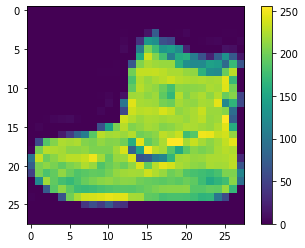

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Escalaremos esses valores no intervalo de 0 e 1 antes de alimentar o modelo da rede
#neural. Para fazer isso, dividiremos os valores por 255. É importante que o conjunto de
#treinamento e o conjunto de teste podem ser pré-processados do mesmo modo.

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
#Para verificar que os dados estão no formato correto e que estamos prontos para
#construir e treinar a rede, vamos mostrar as primeiras 25 imagens do conjunto de
#treinamento e mostrar o nome das classes de cada imagem abaixo.

<function matplotlib.pyplot.show>

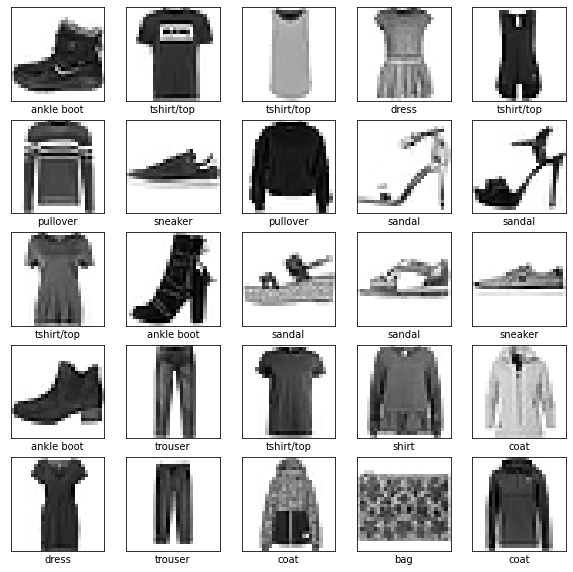

In [ ]:
plt.figure(figsize = (10, 10))
for i in range(25):
	plt.subplot(5, 5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap = plt.cm.binary)
	plt.xlabel(class_names[train_labels[i]])
plt.show

Construindo o Modelo

In [ ]:
#Construir a rede neural requer configurar as camadas do modelo e, depois, compilar o modelo.
#Montando as camadas

model = keras.Sequential([
	keras.layers.Flatten(input_shape = (28, 28)),
	keras.layers.Dense(128, activation = 'relu'),
	keras.layers.Dense(10, activation = 'softmax')])


In [ ]:
#compilando o modelo
#Função Loss: essa função mede quão preciso o modelo é durante o treinamento.
#Queremos minimizar a função para guiar o modelo para a direção certa.
#Optimizer: isso é como o modelo se atualiza com base no dado que ele vê e sua função loss.
#Métricas: usada para monitorar os passos de treinamento e teste. O exemplo abaixo usa a acurácia, a fração das imagens que foram classificadas corretamente.

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Treinando o modelo

In [ ]:
#Treinar a rede neural requer os seguintes passos:
#Alimente o modelo com os dados de treinamento. Neste exemplo, os dados de treinamento são os arrays train_images e train_labels.
#O modelo aprende como associar as imagens as labels.
#Perguntamos ao modelo para fazer previsões sobre o conjunto de teste — nesse exemplo, o array test_images. Verificamos se as previsões combinaram com as labels do array test_labels.

model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4939 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3723 - accuracy: 0.8663
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3318 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3102 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2915 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2780 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2650 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2545 - accuracy: 0.9052
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2454 - accuracy: 0.9091
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

Avaliando o modelo

In [ ]:
#Avaliando a acurácia
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

print('\nTest accuray: ', test_acc, '\nTest loss: ', test_loss)

313/313 - 0s - loss: 0.3330 - accuracy: 0.8854

Test accuray:  0.8853999972343445 
Test loss:  0.3329569101333618


Testando o modelo

In [ ]:
predictions = model.predict(test_images)
predictions[0]

array([9.3117109e-07, 6.5326305e-10, 2.6666347e-10, 1.0238248e-11,
       4.4263704e-08, 4.2057742e-04, 1.4294714e-07, 2.1323469e-02,
       9.1695277e-08, 9.7825480e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color = color)

def plot_values_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#008000')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


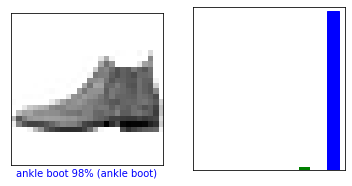

In [ ]:
#Vamos olhar a previsão imagem na posição 0, do array de predição
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_values_array(i, predictions, test_labels)
plt.show()

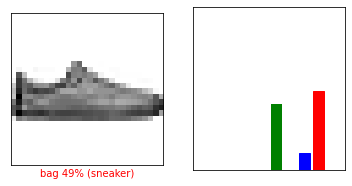

In [ ]:
i = 12
plt.figure(figsize = (6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_values_array(i, predictions, test_labels)
plt.show()

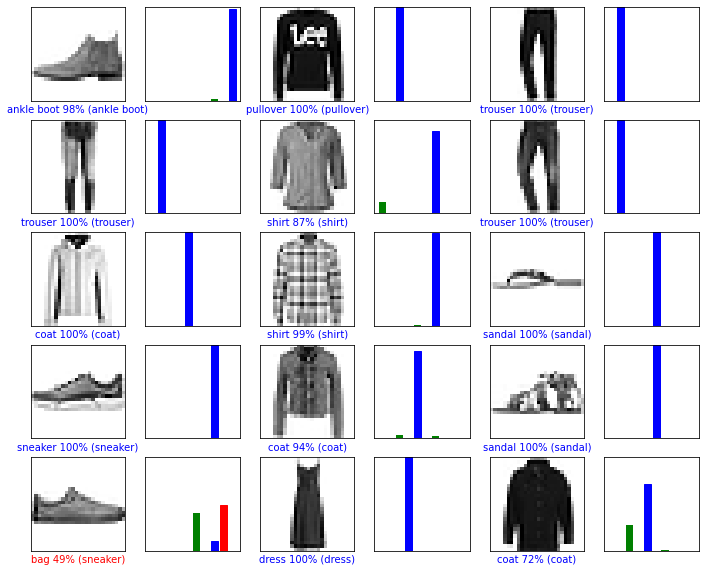

In [ ]:
#plotando o primeiro x test images, labels preditas e as labels verdadeiras
#Plotando as corretas de azul e as incorretas de vermelho
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2 * num_cols, 2*i+2)
  plot_values_array(i, predictions, test_labels)
plt.show()

Predição

In [ ]:
#pegando imagem do dataset
img = test_images[0]
print(img.shape) 

(28, 28)


In [ ]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)
print(predictions_single)

[[9.3117291e-07 6.5326428e-10 2.6666400e-10 1.0238248e-11 4.4263704e-08
  4.2057698e-04 1.4294714e-07 2.1323469e-02 9.1695277e-08 9.7825480e-01]]


([<matplotlib.axis.XTick at 0x7f7df5841470>,
 [Text(0, 0, 'tshirt/top'),
  Text(0, 0, 'trouser'),
  Text(0, 0, 'pullover'),
  Text(0, 0, 'dress'),
  Text(0, 0, 'coat'),
  Text(0, 0, 'sandal'),
  Text(0, 0, 'shirt'),
  Text(0, 0, 'sneaker'),
  Text(0, 0, 'bag'),
  Text(0, 0, 'ankle boot')])

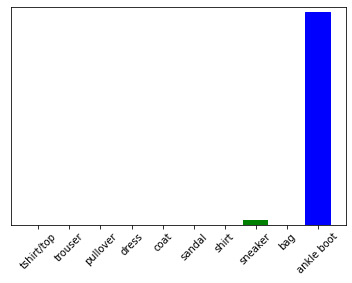

In [ ]:
plot_values_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation = 45)

In [ ]:
np.argmax(predictions_single[0])

9

Fim

Visite meu [github](https://github.com/k3ybladewielder) :3